In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

import time

In [2]:
!pip install jupyter_contrib_nbextensions
!jupyter contrib nbextension install --user
!jupyter nbextension enable execute_time/ExecuteTime

[I 16:16:59 InstallContribNbextensionsApp] jupyter contrib nbextension install --user
[I 16:16:59 InstallContribNbextensionsApp] Installing jupyter_contrib_nbextensions nbextension files to jupyter data directory
[I 16:16:59 InstallContribNbextensionsApp] Installing /home/ubuntu/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/spellchecker -> spellchecker
[I 16:16:59 InstallContribNbextensionsApp] Up to date: /home/ubuntu/.local/share/jupyter/nbextensions/spellchecker/main.css
[I 16:16:59 InstallContribNbextensionsApp] Up to date: /home/ubuntu/.local/share/jupyter/nbextensions/spellchecker/config.yaml
[I 16:16:59 InstallContribNbextensionsApp] Up to date: /home/ubuntu/.local/share/jupyter/nbextensions/spellchecker/README.md
[I 16:16:59 InstallContribNbextensionsApp] Up to date: /home/ubuntu/.local/share/jupyter/nbextensions/spellchecker/main.js
[I 16:16:59 InstallContribNbextensionsApp] Up to date: /home/ubuntu/.local/share/jupyter/nbextensions/spellcheck

In [3]:
from src.model import *

In [4]:
SPECTRA_DIR = 'Bruker_MPA/*'

AFSIS_PATH = Path('afsis/2009-2013/Dry_Chemistry/ICRAF/')

spectra_df = load_spectra_df(SPECTRA_DIR, AFSIS_PATH)


In [5]:
wet_chem_df = pd.read_csv('afsis/2009-2013/Wet_Chemistry/CROPNUTS/Wet_Chemistry_CROPNUTS.csv')
wet_chem_df.head()

,SSN,Public,EC,ExAc,ExBas,M3 Al,M3 B,M3 Ca,M3 Cu,M3 Fe,M3 K,M3 Mg,M3 Mn,M3 Na,M3 P,M3 S,M3 Zn,PH,PSI
0,icr006475,True,0.053,2.56,2.744241,1095.0,0.3337,207.1,1.3150,153.70,306.30,89.5,9.266,42.71,4.495,18.960,2.825,4.682,67.052495
1,icr006586,True,0.193,0.59,16.797753,1165.0,0.7899,1665.0,2.8140,126.80,1186.00,636.7,254.700,40.83,12.510,13.600,1.952,7.062,30.420552
2,icr007929,True,0.305,0.19,16.503619,727.6,0.6142,2518.0,0.2496,260.40,72.57,428.5,35.820,42.94,21.090,14.810,2.742,7.114,60.506163
3,icr008008,True,0.053,0.48,6.302775,1458.0,0.3603,734.3,1.3690,134.10,274.60,222.5,29.110,20.73,109.200,11.400,0.980,5.650,51.470143
4,icr010198,True,0.032,1.05,2.390303,2166.0,0.0100,261.8,1.6860,97.49,91.76,76.5,375.200,49.31,3.958,5.281,1.258,5.501,247.626533


In [7]:
WET_CHEM_PATH = 'afsis/2009-2013/Wet_Chemistry/CROPNUTS/Wet_Chemistry_CROPNUTS.csv'
elements = ['M3 Ca', 'M3 K', 'M3 Mg', 'M3 P']
columns_to_load = elements + ['SSN']


wet_chem_df = pd.read_csv(WET_CHEM_PATH, index_col='SSN', usecols=columns_to_load)

In [8]:
%%time
data_df = spectra_df.merge(wet_chem_df, left_index=True, right_index=True)


CPU times: user 53.4 ms, sys: 3.63 ms, total: 57.1 ms
Wall time: 56.4 ms


In [10]:
%%time
contains_nan = data_df.isnull().values.any()
contains_nan

CPU times: user 5.12 ms, sys: 60 µs, total: 5.18 ms
Wall time: 4.32 ms


False

In [11]:
%%time
y = data_df[['M3 Ca', 'M3 K', 'M3 Mg', 'M3 P']]

CPU times: user 1.15 ms, sys: 0 ns, total: 1.15 ms
Wall time: 1.12 ms


In [15]:
%%time
if contains_nan:
    y_mask = y.notnull()
    y = y[y_mask]
    X = spectra_df[y_mask]
else:
    X = spectra_df

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.68 µs


In [16]:
%%time
y = np.log1p(y)

CPU times: user 1 ms, sys: 0 ns, total: 1 ms
Wall time: 735 µs


In [17]:
%%time
X = np.apply_along_axis(np.gradient, 1, X)

CPU times: user 69.8 ms, sys: 99 µs, total: 69.9 ms
Wall time: 69.1 ms


In [18]:
X_train, X_validate, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
Y_COLUMN = 'M3 K'

m3_k_xgb = basic_xgboost(spectra_df, WET_CHEM_PATH, Y_COLUMN)

Training model for M3 K.
1907 samples available.


KeyboardInterrupt: 

In [19]:
%%time
Y_COLUMN = 'M3 Ca'

m3_ca_xgb = basic_xgboost(spectra_df, WET_CHEM_PATH, Y_COLUMN)

Training model for M3 Ca.
1907 samples available.


KeyboardInterrupt: 

In [50]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error

In [20]:
%%time
Y_COLUMN = 'M3 Ca'

m3_ca_xgb = basic_xgboost3(X_train, y_train[Y_COLUMN])

Training model for M3 Ca.
1277 samples available.
CV r^2 score: 0.6787347479344881
CPU times: user 5min 9s, sys: 71.7 ms, total: 5min 9s
Wall time: 5min 9s


In [22]:
%%time
m3_ca_xgb.fit(X_train, y_train[Y_COLUMN])

CPU times: user 1min 42s, sys: 12 ms, total: 1min 42s
Wall time: 1min 42s


XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=20, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [23]:
%%time
yhat = m3_ca_xgb.predict(X_validate)

CPU times: user 32.6 ms, sys: 1 µs, total: 32.6 ms
Wall time: 31.8 ms


In [25]:
np.sqrt(mean_squared_error(y_test[Y_COLUMN], yhat))

0.12162717132053891

In [18]:
%%time
Y_COLUMN = 'M3 Mg'

m3_mg_xgb = basic_xgboost3(X_train, y_train[Y_COLUMN])


Training model for M3 Mg.
1277 samples available.
CV r^2 score: -0.002401975056961325
CPU times: user 1.41 s, sys: 1.06 ms, total: 1.41 s
Wall time: 1.4 s


In [ ]:
Y_COLUMN = 'M3 P'

In [26]:
%%time
Y_COLUMN = 'M3 Mg'

m3_mg_xgb = basic_xgboost3(X_train, y_train[Y_COLUMN])

Training model for M3 Mg.
1277 samples available.
CV r^2 score: 0.645165407991274
CPU times: user 4min 12s, sys: 76 ms, total: 4min 12s
Wall time: 4min 12s


In [27]:
%%time
m3_mg_xgb.fit(X_train, y_train[Y_COLUMN])

CPU times: user 1min 21s, sys: 16 ms, total: 1min 21s
Wall time: 1min 21s


XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=20, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [28]:
%%time
yhat = m3_mg_xgb.predict(X_validate)

CPU times: user 24.9 ms, sys: 4 ms, total: 28.9 ms
Wall time: 28.1 ms


In [40]:
rmse = np.sqrt(mean_squared_error(y_test[Y_COLUMN], yhat))

In [41]:
_mean = y[Y_COLUMN].mean()

In [42]:
rmse / _mean

0.0648945510462739

In [44]:
y[Y_COLUMN].std()

0.18552749620900413

In [ ]:
# plot prediction vs output, compare visually
#partial dependency, how far off on avg, always wrong in this region vs that region and informs features to engineer

In [45]:
%%time
Y_COLUMN = 'M3 P'
m3_p_xgb = basic_xgboost3(X_train, y_train[Y_COLUMN])

In [46]:
m3_p_xgb.fit(X_train, y_train[Y_COLUMN])
yhat = m3_p_xgb.predict(X_validate)
rmse = np.sqrt(mean_squared_error(y_test[Y_COLUMN], yhat))
_mean = y[Y_COLUMN].mean()
rmse / _mean

0.2608249363629176

In [47]:
%%time
Y_COLUMN = 'M3 K'
m3_k_xgb = basic_xgboost3(X_train, y_train[Y_COLUMN])

Training model for M3 K.
1277 samples available.
CV r^2 score: 0.44896083662554775
CPU times: user 5min 29s, sys: 84 ms, total: 5min 29s
Wall time: 5min 29s


In [48]:
%%time
m3_k_xgb.fit(X_train, y_train[Y_COLUMN])
yhat = m3_k_xgb.predict(X_validate)
rmse = np.sqrt(mean_squared_error(y_test[Y_COLUMN], yhat))
_mean = y[Y_COLUMN].mean()
rmse / _mean

CPU times: user 2min 7s, sys: 20 ms, total: 2min 7s
Wall time: 2min 7s


0.07712345694923932

In [49]:
np.sqrt(mean_squared_error(y_test[Y_COLUMN], yhat))

0.13204418023958925

In [51]:
np.sqrt(mean_squared_log_error(y_test[Y_COLUMN], yhat))

0.05750316695953364

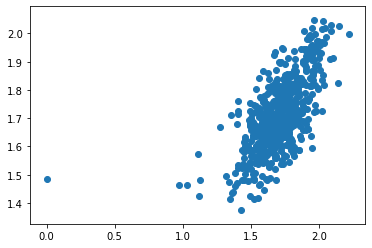

In [54]:
plt.scatter(y_test[Y_COLUMN], yhat)

In [59]:
m3_k_xgb.score(X_validate, y_test[Y_COLUMN])

0.4400076265834207

In [65]:
feature_importances = m3_k_xgb.feature_importances_[:5]

In [68]:
feature_importances = 100*m3_k_xgb.feature_importances_ / np.sum(m3_k_xgb.feature_importances_)
feature_importances, feature_names, feature_idxs = \
    zip(*sorted(zip(feature_importances, names, range(len(names)))))

NameError: name 'names' is not defined

In [67]:
N_COLS = 3
fimportances = list(feature_importances)
#fnames = list(feature_names)

pd_plots = [partial_dependence(model,
                               target_feature,
                               X=X_train, 
                               grid_resolution=50)
            for target_feature in feature_idxs]
pd_plots = list(zip([pdp[0][0] for pdp in pd_plots],
                    [pdp[1][0] for pdp in pd_plots]))
            
fig, axes = plt.subplots(nrows=3, ncols=N_COLS, sharey=True, 
                         figsize=(12.0, 8.0))
# in reversed order
for i, (y_axis, x_axis) in enumerate(pd_plots[(3*N_COLS-1)::(-1)]):
    ax = axes.flatten()[i] # axes is a 2d array
    ax.plot(x_axis, y_axis, color="purple")
    ax.set_xlim([np.min(x_axis), np.max(x_axis)])
    ax.set_xlabel(fnames[len(fnames)-1-i])
    
fig.suptitle("Partial Dependence Plots (Ordered by Feature Importance)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

NameError: name 'feature_idxs' is not defined